In [67]:
%matplotlib inline
from __future__ import division
import numpy as np
import os
import sys
import datetime
from subprocess import call
import subprocess
import glob

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import djPyi2 as DJ
from djPyi2 import Common as CM
from djPyi2 import mpltools

import pandas as pd
pd.options.mode.chained_assignment = None
import csv
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy 
import pybedtools as pbt
import ciepy
import cardipspy as cpy
import itertools
import tempfile
import six
import networkx as nx
import scipy.stats as stats
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
from mpl_toolkits.axes_grid1 import  make_axes_locatable
import datetime

from scipy.stats import mode
dy_name = 'Figures'

private_out = os.path.join(DJ.root, 'private_output', dy_name)
if not os.path.exists(private_out):
    DJ.makedir(private_out)
import vapeplot

In [59]:
def palplot(pal, labels=False, size=1):
    """Plot the values in a color palette as a horizontal array.

    Parameters
    ----------
    pal : sequence of matplotlib colors
        colors, i.e. as returned by seaborn.color_palette()
    size :
        scaling factor for size of plot

    """
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n))
    
    if not labels:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    return ax

['INV', 'LINE1', 'SVA', 'rMEI', 'mCNV', 'STR', 'DUP', 'DEL', 'ALU', 'BND']


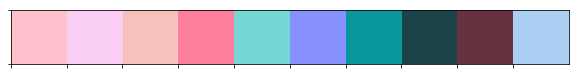

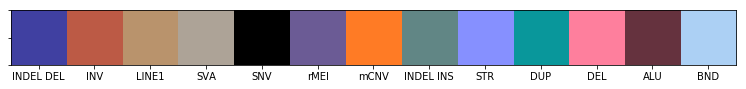

In [117]:
c = vapeplot.palette('macplus') + vapeplot.palette('mallsoft')

svtypes_ordered = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'BND', 'STR']

color_dict = dict(zip(svtypes_ordered, c))

sns.palplot(color_dict.values())
print color_dict.keys()
color_dict['DEL'] = color_dict['rMEI']

color_dict['rMEI'] = '#6b5b95'
color_dict['mCNV'] = "#ff7b25"
color_dict['INV'] = '#bc5a45'
color_dict['LINE1'] = '#b9936c'
color_dict['SVA'] = '#ada397'
color_dict['INDEL INS'] = '#618685'
color_dict['INDEL DEL'] = '#4040a1'
color_dict['SNV'] = 'black'

palplot(color_dict.values(), color_dict.keys())

['INV', 'LINE1', 'SVA', 'rMEI', 'mCNV', 'STR', 'DUP', 'DEL', 'ALU', 'BND']


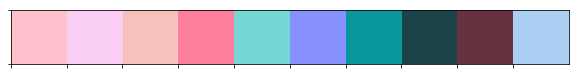

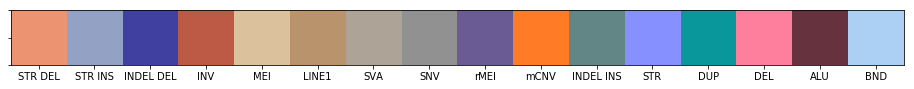

In [119]:
c = vapeplot.palette('macplus') + vapeplot.palette('mallsoft')

svtypes_ordered = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'BND', 'STR']

color_dict = dict(zip(svtypes_ordered, c))

sns.palplot(color_dict.values())
print color_dict.keys()
color_dict['DEL'] = color_dict['rMEI']

color_dict['rMEI'] = '#6b5b95'
color_dict['mCNV'] = "#ff7b25"
color_dict['INV'] = '#bc5a45'
color_dict['LINE1'] = '#b9936c'
color_dict['SVA'] = '#ada397'
color_dict['INDEL INS'] = '#618685'
color_dict['INDEL DEL'] = '#4040a1'
color_dict['SNV'] = '#919191'
color_dict['STR DEL']= (0.9278431372549021, 0.5796078431372549, 0.44470588235294106)
color_dict['STR INS']= (0.5772549019607844, 0.6368627450980392, 0.7717647058823529)
color_dict['MEI']= (0.8662745098039215, 0.7627450980392156, 0.6121568627450982)


palplot(color_dict.values(), color_dict.keys())

In [120]:
color_pal_series = pd.Series(color_dict)

CM.save_dataframe('color_pal_svtypes_all', color_pal_series, private_out)

color_pal_svtypes_all = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/color_pal_svtypes_all.pkl')
color_pal_svtypes_all = pd.read_csv('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/color_pal_svtypes_all.tsv', sep='\t')
# all vars recorded: /frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/load_saved_nb_variables.py
# pickled vars recorded:/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/load_pickled_nb_variables.py


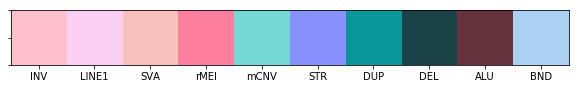

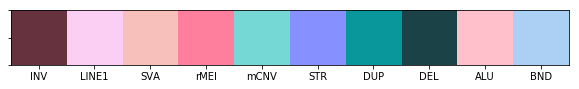

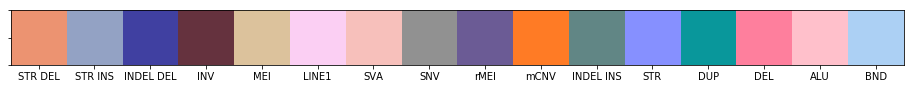

In [118]:
c = vapeplot.palette('macplus') + vapeplot.palette('mallsoft')
svtypes_ordered = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'BND', 'STR']
color_dict = dict(zip(svtypes_ordered, c))
palplot(color_dict.values(), color_dict.keys())
c1 = color_dict['ALU']
c2 = color_dict['INV']

color_dict['ALU'] = c2
color_dict['INV'] = c1
palplot(color_dict.values(), color_dict.keys())
color_dict['DEL'] = color_dict['rMEI']
color_dict['rMEI'] = '#6b5b95'
color_dict['mCNV'] = "#ff7b25"
# color_dict['INV'] = '#bc5a45'
# color_dict['LINE1'] = '#b9936c'
# color_dict['SVA'] = '#ada397'
color_dict['INDEL INS'] = '#618685'
color_dict['INDEL DEL'] = '#4040a1'
color_dict['SNV'] = '#919191'
# color_dict['DEL'] = '#bf4040'

color_dict['STR DEL']= (0.9278431372549021, 0.5796078431372549, 0.44470588235294106)
color_dict['STR INS']= (0.5772549019607844, 0.6368627450980392, 0.7717647058823529)
color_dict['MEI']= (0.8662745098039215, 0.7627450980392156, 0.6121568627450982)

palplot(color_dict.values(), color_dict.keys())

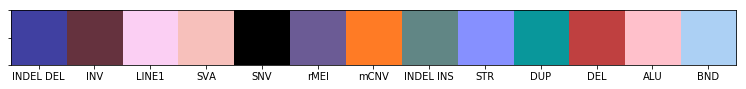

In [94]:
palplot(color_dict.values(), color_dict.keys())

In [95]:
color_dict

{'ALU': '#ffc0cb',
 'BND': '#acd0f4',
 'DEL': '#bf4040',
 'DUP': '#09979b',
 'INDEL DEL': '#4040a1',
 'INDEL INS': '#618685',
 'INV': '#65323e',
 'LINE1': '#fbcff3',
 'SNV': 'black',
 'STR': '#8690ff',
 'SVA': '#f7c0bb',
 'mCNV': '#ff7b25',
 'rMEI': '#6b5b95'}

In [115]:
color_pal_series = pd.Series(color_dict)

CM.save_dataframe('color_pal_svtypes_all', color_pal_series, private_out)

In [73]:
cols = 'GS	GS_LCNV GS,GS_LCNV	GS,GS_LCNV,SS	GS,SS GS_LCNV,SS	SS 	HipSTR	MELT'.split()

pal_combined = vapeplot.palette('jazzcup') + vapeplot.palette('seapunk')
pal = dict(zip(cols, pal_combined))
pal['HipSTR'] = '#a2b9bc'

In [74]:
pal_callers = pd.Series(pal)

In [79]:
CM.save_dataframe('pallete_variant_callers', pal_callers, private_out)

pallete_variant_callers = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/pallete_variant_callers.pkl')
pallete_variant_callers = pd.read_csv('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/pallete_variant_callers.tsv', sep='\t')
# all vars recorded: /frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/load_saved_nb_variables.py
# pickled vars recorded:/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/load_pickled_nb_variables.py


In [76]:
pal

{'GS': '#392682',
 'GS,GS_LCNV': '#3f86bc',
 'GS,GS_LCNV,SS': '#28ada8',
 'GS,SS': '#83dde0',
 'GS_LCNV': '#7a3a9a',
 'GS_LCNV,SS': '#532e57',
 'HipSTR': '#a2b9bc',
 'MELT': '#569874',
 'SS': '#a997ab'}

# Pal for the multi stacked bar

In [108]:

pal_colors = sns.color_palette("Set2", n_colors=8, desat=.8)

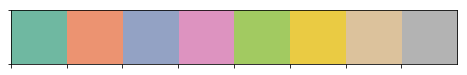

In [107]:
sns.palplot(sns.color_palette("Set2", n_colors=8, desat=.8))

In [111]:
pal_sbp_burden = {'DUP': pal_colors[0], 'DEL': pal_colors[1], 'INDEL INS': pal_colors[2], 'INDEL DEL': pal_colors[1],
'STR DEL':  pal_colors[1], 'STR INS': pal_colors[2], 'SNV': pal_colors[7], 'MEI': pal_colors[6], 'rMEI': pal_colors[1]}

In [112]:
pal_burden_series = pd.Series(pal_sbp_burden)

In [113]:
CM.save_dataframe('pal_burden_series', pal_burden_series, private_out)

pal_burden_series = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/pal_burden_series.pkl')
pal_burden_series = pd.read_csv('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/pal_burden_series.tsv', sep='\t')
# all vars recorded: /frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/load_saved_nb_variables.py
# pickled vars recorded:/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/load_pickled_nb_variables.py


In [96]:
# color_pal_svtypes_all = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/color_pal_svtypes_all.pkl')

# pal = color_pal_svtypes_all.to_dict()

# palplot(pal.values(), pal.keys())

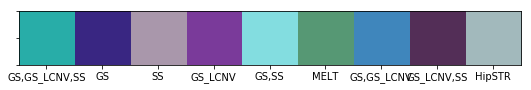

In [78]:
palplot(pal.values(), pal.keys())

In [56]:
# melt replication figure
labs_svtypes = ['ALU', 'LINE1', 'SVA', 'all']
colors_svtypes = ['#00aedb', '#d11141', '#00b159', 'black']

In [39]:
x = sns.choose_cubehelix_palette()

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT05LCBkZXNjcmlwdGlvbj11J25fY29sb3JzJywgbWF4PTE2LCBtaW49MiksIEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3LigKY=


In [46]:
mei = x

In [52]:
# overlap of 1kgp and gtex

colors_co_discovered = [ (0.6770011534025375, 0.6770011534025375, 0.6770011534025375) ,
          (1.0, 0.7058823529411765, 0.5098039215686274) ,
          (0.5085736255286428, 0.5085736255286428, 0.5085736255286428),
          (0.5529411764705883, 0.8980392156862745, 0.6313725490196078)]

cats = ['Co-Discovered-1KGP', 'Co-Discovered-All', 'Co-Discovered-GTEx']



In [ ]:
cats.

In [18]:
order_variants = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'BND', 'STR']
color_dict = dict(zip(order_variants, sns.color_palette('hls', len(order_variants))))

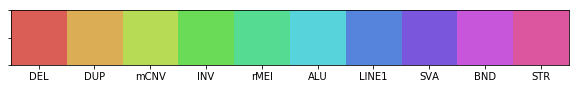

In [19]:
ax = palplot(sns.color_palette('xkcd', len(order_variants)), order_variants)

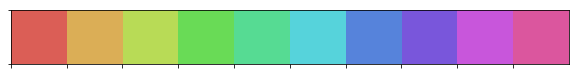

In [4]:
sns.palplot(sns.color_palette('hls', n_colors=10))

In [5]:
sns.__file__

'/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/seaborn/__init__.pyc'

In [2]:
order_variants = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'BND', 'STR']

# available colors 

In [ ]:
SEABORN_PALETTES = dict(
    deep=["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B3",
          "#937860", "#DA8BC3", "#8C8C8C", "#CCB974", "#64B5CD"],
    deep6=["#4C72B0", "#55A868", "#C44E52",
           "#8172B3", "#CCB974", "#64B5CD"],
    muted=["#4878D0", "#EE854A", "#6ACC64", "#D65F5F", "#956CB4",
           "#8C613C", "#DC7EC0", "#797979", "#D5BB67", "#82C6E2"],
    muted6=["#4878D0", "#6ACC64", "#D65F5F",
            "#956CB4", "#D5BB67", "#82C6E2"],
    pastel=["#A1C9F4", "#FFB482", "#8DE5A1", "#FF9F9B", "#D0BBFF",
            "#DEBB9B", "#FAB0E4", "#CFCFCF", "#FFFEA3", "#B9F2F0"],
    pastel6=["#A1C9F4", "#8DE5A1", "#FF9F9B",
             "#D0BBFF", "#FFFEA3", "#B9F2F0"],
    bright=["#023EFF", "#FF7C00", "#1AC938", "#E8000B", "#8B2BE2",
            "#9F4800", "#F14CC1", "#A3A3A3", "#FFC400", "#00D7FF"],
    bright6=["#023EFF", "#1AC938", "#E8000B",
             "#8B2BE2", "#FFC400", "#00D7FF"],
    dark=["#001C7F", "#B1400D", "#12711C", "#8C0800", "#591E71",
          "#592F0D", "#A23582", "#3C3C3C", "#B8850A", "#006374"],
    dark6=["#001C7F", "#12711C", "#8C0800",
           "#591E71", "#B8850A", "#006374"],
    colorblind=["#0173B2", "#DE8F05", "#029E73", "#D55E00", "#CC78BC",
                "#CA9161", "#FBAFE4", "#949494", "#ECE133", "#56B4E9"],
    colorblind6=["#0173B2", "#029E73", "#D55E00",
                 "#CC78BC", "#ECE133", "#56B4E9"]
    )


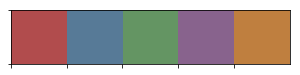

In [28]:
sns.palplot(sns.color_palette("Set1", n_colors=5, desat=.5))

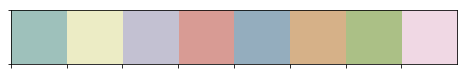

In [22]:
sns.palplot(sns.color_palette("Set3", n_colors=8, desat=.5))

In [23]:
sns.palplot(sns.color_palette(, n_colors=8, desat=.5))

ValueError: Set4 is not a valid palette name

In [31]:
sns.choose_light_palette()

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xNzksIGRlc2NyaXB0aW9uPXUnaCcsIG1heD0zNTkpLCBJbnRTbGlkZXIodmFsdWU9NDksIGRlc2NyaXB0aW9uPXUncycsIG3igKY=


[array([0.94054458, 0.95945542, 0.95679586, 1.        ]),
 array([0.87363254, 0.90742758, 0.90267475, 1.        ]),
 array([0.80672051, 0.85539974, 0.84855364, 1.        ]),
 array([0.73741876, 0.80151376, 0.79249963, 1.        ]),
 array([0.67050672, 0.74948591, 0.73837852, 1.        ]),
 array([0.60120497, 0.69559993, 0.68232452, 1.        ]),
 array([0.53429294, 0.64357209, 0.62820341, 1.        ]),
 array([0.46499119, 0.58968611, 0.5721494 , 1.        ]),
 array([0.39807915, 0.53765827, 0.51802829, 1.        ]),
 array([0.33116712, 0.48563043, 0.46390718, 1.        ])]

In [30]:
sns.choose_dark_palette()

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xNzksIGRlc2NyaXB0aW9uPXUnaCcsIG1heD0zNTkpLCBJbnRTbGlkZXIodmFsdWU9NDksIGRlc2NyaXB0aW9uPXUncycsIG3igKY=


[array([0.13333333, 0.13333333, 0.13333333, 1.        ]),
 array([0.15505626, 0.17201694, 0.16963164, 1.        ]),
 array([0.17677918, 0.21070054, 0.20592994, 1.        ]),
 array([0.19927793, 0.2507657 , 0.24352462, 1.        ]),
 array([0.22100085, 0.2894493 , 0.27982292, 1.        ]),
 array([0.2434996 , 0.32951446, 0.31741759, 1.        ]),
 array([0.26522252, 0.36819806, 0.3537159 , 1.        ]),
 array([0.28772127, 0.40826322, 0.39131057, 1.        ]),
 array([0.30944419, 0.44694683, 0.42760888, 1.        ]),
 array([0.33116712, 0.48563043, 0.46390718, 1.        ])]

In [29]:
sns.choose_cubehelix_palette()

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT05LCBkZXNjcmlwdGlvbj11J25fY29sb3JzJywgbWF4PTE2LCBtaW49MiksIEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3LigKY=


[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.35317781405034754],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [25]:
sns.choose_colorbrewer_palette('qualitative')

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnbmFtZScsIG9wdGlvbnM9KCdTZXQxJywgJ1NldDInLCAnU2V0MycsICdQYWlyZWQnLCAnQWNjZW50JywgJ1Bhc3TigKY=


[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]